In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
import gdown
gdown.download(id='1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR', output='D:\\Other\\datasets\\')
gdown.download(id='1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg', output='D:\\Other\\datasets\\')

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: D:\Other\datasets\sign_mnist_train.csv
100%|██████████| 83.3M/83.3M [00:11<00:00, 7.30MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: D:\Other\datasets\sign_mnist_test.csv
100%|██████████| 21.8M/21.8M [00:02<00:00, 7.60MB/s]


'D:\\Other\\datasets\\sign_mnist_test.csv'

In [4]:
base_dir = 'D:\\Other\\datasets\\sign_mnist\\'

In [7]:
def get_data(filename):
    images = []
    labels = []
    with open(filename) as training_file:
        reader = csv.reader(training_file)
        next(reader)
        for row in reader:
            labels.append(row[0])
            img = np.array_split(row[1:], 28)
            images.append(img)
    return np.array(images, dtype='float'), np.array(labels, dtype='float')

training_images, training_labels = get_data(base_dir+'sign_mnist_train.csv')
testing_images, testing_labels = get_data(base_dir+'sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [9]:
training_images = tf.expand_dims(training_images, axis=-1)
testing_images = tf.expand_dims(testing_images, axis=-1)
print(training_images.shape, testing_images.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    fill_mode='nearest',
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_generator = train_datagen.flow(training_images, training_labels, batch_size=4)
val_generator = train_datagen.flow(testing_images, testing_labels, batch_size=4)

history = model.fit(train_generator,epochs=5,
                    validation_data=val_generator)

Epoch 1/5
6864/6864 [==============================] - 45s 7ms/step - loss: 1.8433 - accuracy: 0.4151 - val_loss: 1.3493 - val_accuracy: 0.5305

In [14]:
model.evaluate(testing_images, testing_labels)



225/225 [==============================] - 1s 4ms/step - loss: 326.7384 - accuracy: 0.5990

[326.7384338378906, 0.598996102809906]

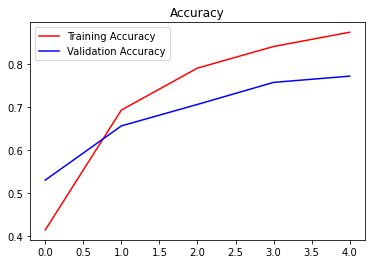

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

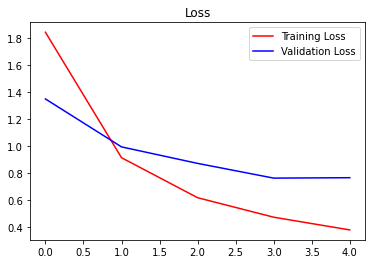

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss')
plt.legend(loc=0)
plt.figure()
plt.show()